# Overview

### - Data Exploration

### - Building the Model
   ####        - Choosing a class of model
   ####        - Fitting model to training data

### - Model Validation

### - Results


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
outcomes = df[['Outcome']].to_numpy().flatten()
#convert Y from 2D to 1D array

data = df.drop('Outcome', axis=1)
print(data)
print(outcomes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Data Exploration

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

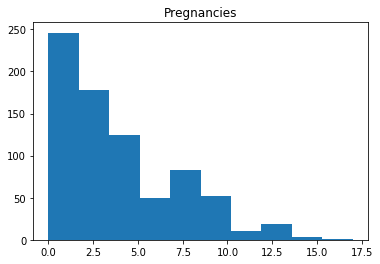

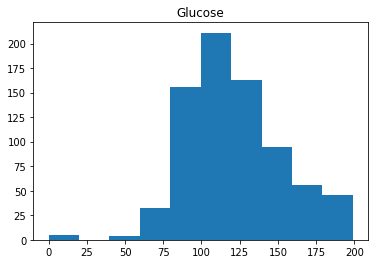

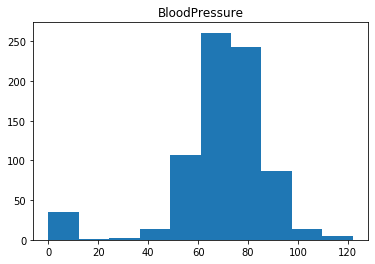

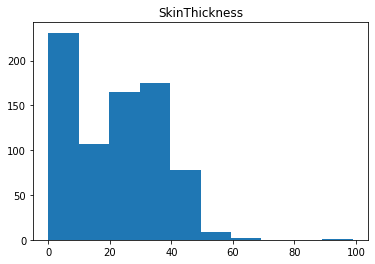

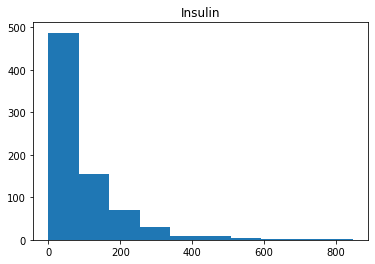

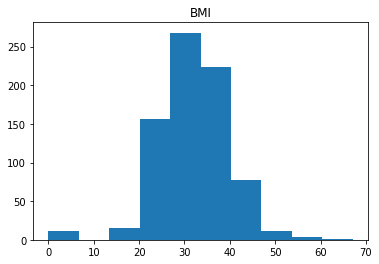

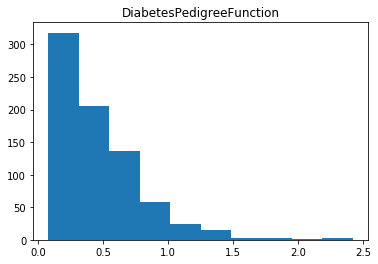

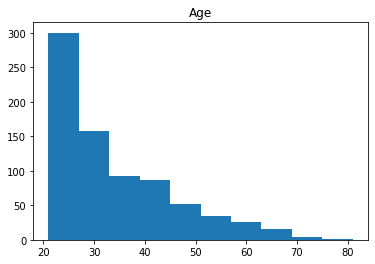

In [8]:
for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

C:\Users\micha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\micha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


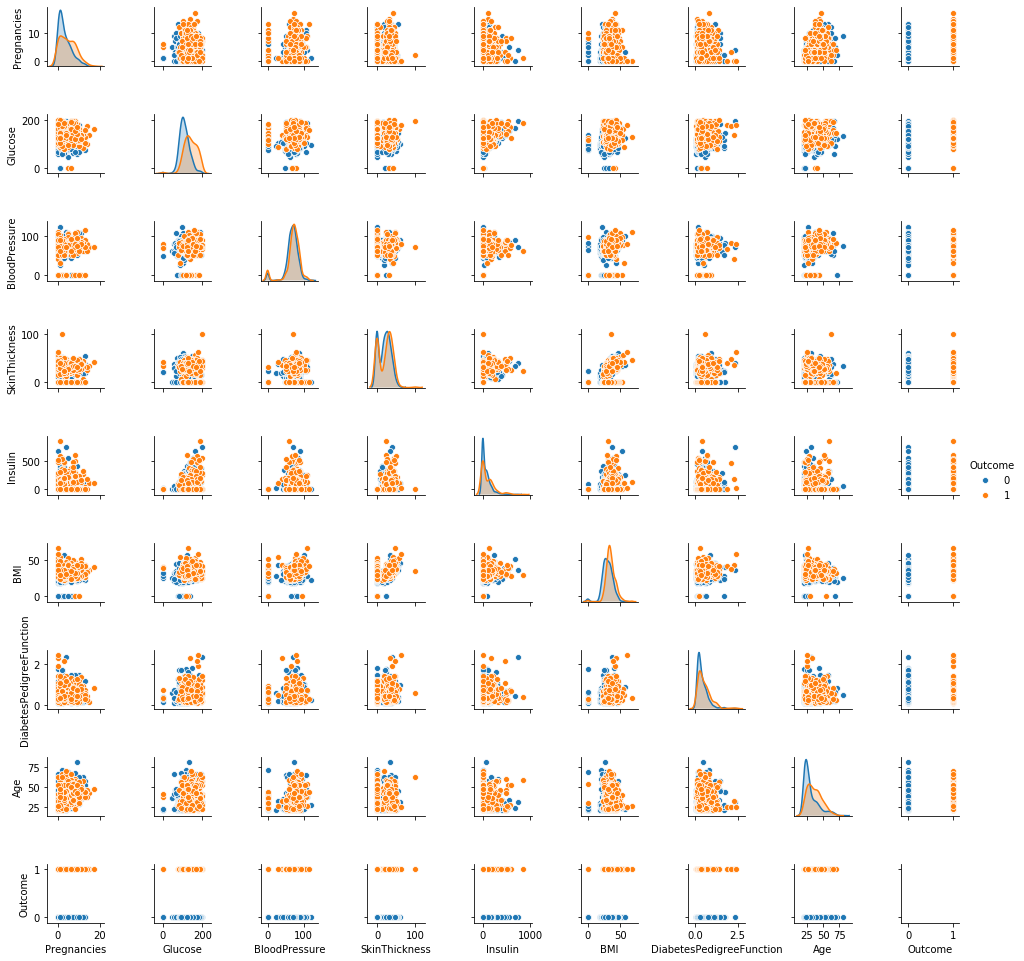

In [9]:
sns.pairplot(df, hue='Outcome', height=1.5);

- From the above pair plot, unsurprisingly, those with Diabetes tend to have higher glucose levels than those who don't.
- Those with Diabetes also tend to have a slightly higher BMI than those who don't

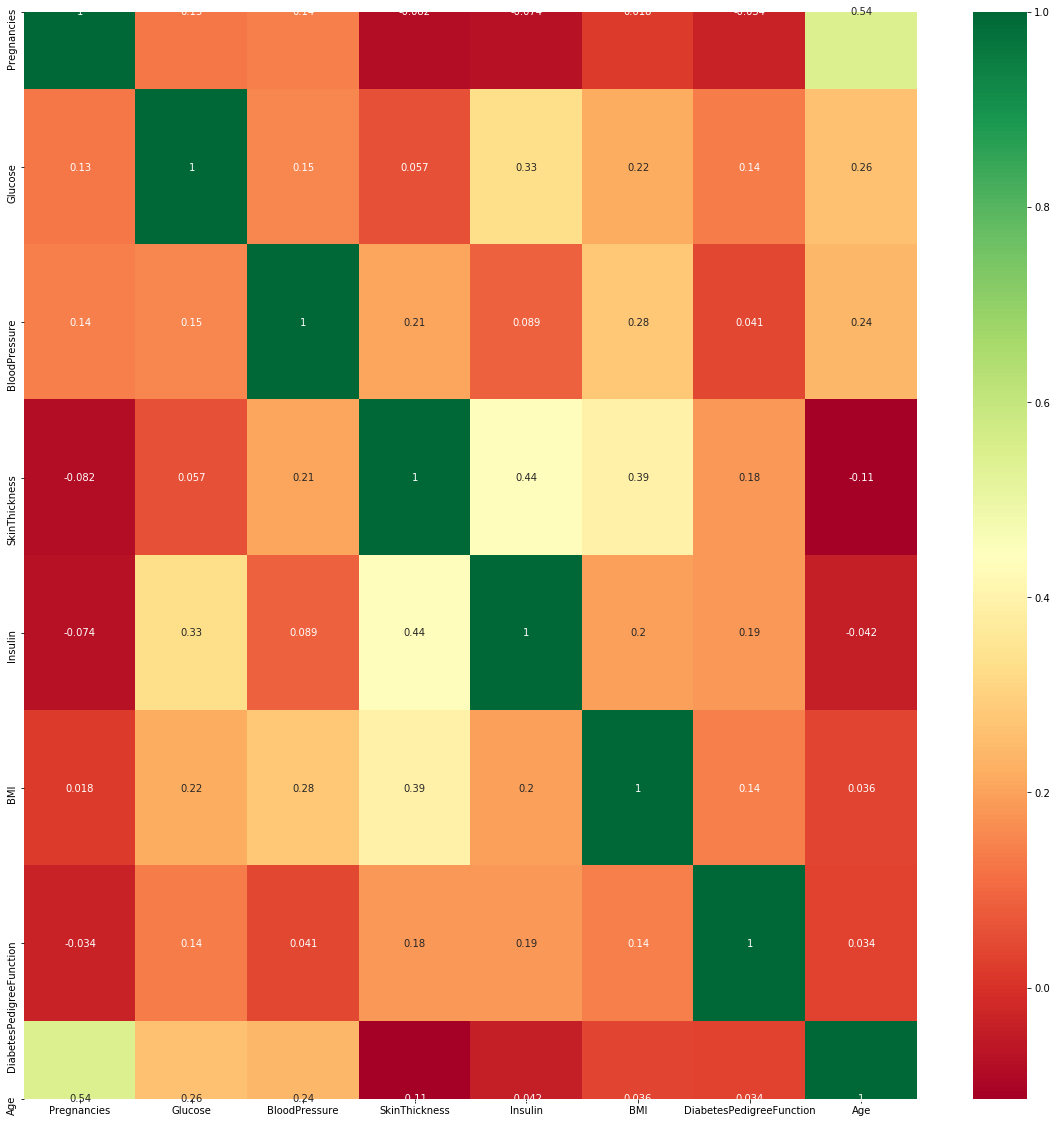

In [10]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap = "RdYlGn")

# Building the Model

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(data, outcomes, test_size = 0.3)

## Choosing a class of model


In [13]:
from sklearn.model_selection import KFold

In [14]:
kf = KFold(n_splits = 10) #10 folds
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [15]:
#create function that returns a model's score
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [16]:
data_numpy = data.to_numpy()

#some machine learning algorithms that I am familiar with
scores_log_reg = [] #logistic regression
scores_rand_for = [] #random forest
scores_dec_tree = [] #decision tree

for  train_index, test_index in kf.split(data):
    X_train, X_test, Y_train, Y_test = data_numpy[train_index], data_numpy[test_index],outcomes[train_index],outcomes[test_index]
    scores_log_reg.append(get_score(LogisticRegression(solver='lbfgs', max_iter=1000), X_train, X_test, Y_train, Y_test))
    scores_dec_tree.append(get_score(DecisionTreeClassifier(), X_train, X_test, Y_train, Y_test))
    scores_rand_for.append(get_score(RandomForestClassifier(n_estimators = 20), X_train, X_test, Y_train, Y_test))

In [17]:
scores_log_reg

[0.6883116883116883,
 0.8181818181818182,
 0.7662337662337663,
 0.6883116883116883,
 0.7792207792207793,
 0.7922077922077922,
 0.8441558441558441,
 0.8311688311688312,
 0.75,
 0.8026315789473685]

In [18]:
scores_dec_tree

[0.6233766233766234,
 0.7922077922077922,
 0.6883116883116883,
 0.5584415584415584,
 0.6883116883116883,
 0.7402597402597403,
 0.7272727272727273,
 0.7792207792207793,
 0.631578947368421,
 0.7105263157894737]

In [19]:
scores_rand_for

[0.7272727272727273,
 0.8181818181818182,
 0.7142857142857143,
 0.6623376623376623,
 0.7922077922077922,
 0.7922077922077922,
 0.8051948051948052,
 0.8571428571428571,
 0.7236842105263158,
 0.7631578947368421]

In [20]:
np.mean(scores_log_reg)

0.7760423786739576

In [21]:
np.mean(scores_dec_tree)

0.6939507860560492

In [22]:
np.mean(scores_rand_for)

0.7655673274094328

- Using logistic regression seems to give us a higher score than using random forest and decision tree.
- We will use logistic regression for our final preditive model

## Fitting model to training data

In [23]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
importance = log_model.coef_[0]

Feature: 0, Score: 0.13354
Feature: 1, Score: 0.03368
Feature: 2, Score: -0.01370
Feature: 3, Score: 0.00112
Feature: 4, Score: -0.00114
Feature: 5, Score: 0.09720
Feature: 6, Score: 0.90876
Feature: 7, Score: 0.00991


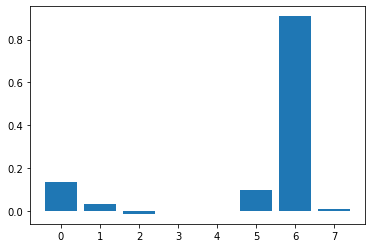

In [25]:
#finding most important features
importance = log_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Model Validation

In [32]:
from sklearn import metrics

In [28]:
predictions = log_model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
Y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [35]:
cnf_matrix = metrics.confusion_matrix(Y_test, predictions)
cnf_matrix

array([[43,  3],
       [12, 18]], dtype=int64)

Text(0.5, 24.0, 'Predicted label')

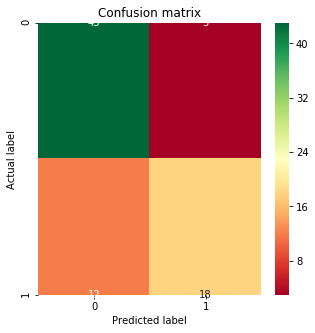

In [53]:
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
#evaluating metrics
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
print("Precision:",metrics.precision_score(Y_test, predictions))
print("Recall:",metrics.recall_score(Y_test, predictions))

Accuracy: 0.8026315789473685
Precision: 0.8571428571428571
Recall: 0.6


# Results

- The logistic regression model was able to predict whether or not a patient had diabetes with an accuracy of 80.2%. 
- The model has a precision of 85.7%, meaning that in all the patients with diabetes in the test data, it was able to correctly predict that they had diabetes 85.7% of the time
- The recall is 60%, meaning that in all the patients that were predicted to have diabetes, 60% of them were actually correct.